# 영양소 데이터

## 사례

### Precision Nutrition

https://tech.kakaoenterprise.com/84

http://manuscriptlink-society-file.s3.amazonaws.com/kips/conference/2020fall/presentation/KIPS_C2020B0328.pdf

https://academic.oup.com/advances/article/13/6/2573/6724380

## 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nutrients.csv')

* The 'Food' column denotes name of the item and 'Measure' denotes quantity of the food item used to find the other nutrients.
"t" in nutrient columns represents that only a trace amount is available.

* Food: 식품 이름
* Measure: 양
* Grams: 단위
* Calories: 칼로리
* Protein: 단백질
* Fat: 지방
* Sat.Fat: 포화지방
* Fiber: 식이섬유
* Carbs: 탄수화물
* Category: 식품 종류

In [3]:
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


## 결측치 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [5]:
modi_df = df.dropna()
modi_df = modi_df.reset_index()
modi_df.head()

,index,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


## 전처리

### 인덱스 열 제거

In [6]:
modi_df = modi_df.drop('index', axis=1)
modi_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


### 숫자 자릿수 구분 제거

In [7]:
modi_df = modi_df.replace(",", "", regex=True)

modi_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


### 숫자 데이터에서 이상값 확인 및 제거

In [8]:
check = {i: [] for i in modi_df.columns[2:-1]}

for col in modi_df.columns[2:-1]:
    for i, j in enumerate(modi_df[col]):
        if not j.isdigit() and j not in check[col] and '.' not in j:
            check[col].append(j)

check

{'Grams': [],
 'Calories': ['8-44'],
 'Protein': ['t', '-1'],
 'Fat': ['t', "t'"],
 'Sat.Fat': ['t'],
 'Fiber': ['t', 'a'],
 'Carbs': ['t']}

In [9]:
modi_df = modi_df.replace("t", 0)
modi_df = modi_df.replace("t'", 0)

modi_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


In [10]:
for i, j in enumerate(modi_df['Calories']):
    if j == '8-44':
        print(i, j)

90 8-44


In [11]:
modi_df['Calories'][90]=(8+44)/2
modi_df['Calories'][90]

26.0

* 값 확인 후 대체
    * 고등어

In [12]:
modi_df['Fiber'] = modi_df['Fiber'].replace("a", 0)

* 확인

In [13]:
modi_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,DrinksAlcohol Beverages
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,DrinksAlcohol Beverages
329,Root beer,12 oz.,346,140,0,0,0,0,35,DrinksAlcohol Beverages
330,Coffee,1 cup,230,3,0,0,0,0,1,DrinksAlcohol Beverages


### 숫자형태의 문자열 숫자로 변경

In [14]:
for col in modi_df.columns[2:-1]:
    modi_df[col]=pd.to_numeric(modi_df[col])

In [15]:
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      332 non-null    object 
 1   Measure   332 non-null    object 
 2   Grams     332 non-null    int64  
 3   Calories  332 non-null    float64
 4   Protein   332 non-null    int64  
 5   Fat       332 non-null    int64  
 6   Sat.Fat   332 non-null    int64  
 7   Fiber     332 non-null    float64
 8   Carbs     332 non-null    float64
 9   Category  332 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 26.1+ KB


In [16]:
modi_df.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,188.521084,8.590361,8.451807,6.457831,2.384970,25.169578
std,139.194736,184.073272,17.809184,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


### 이상치 대체

In [17]:
modi_df.loc[modi_df['Protein'] < 0, 'Protein'] = 0

In [18]:
modi_df.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,188.521084,8.593373,8.451807,6.457831,2.384970,25.169578
std,139.194736,184.073272,17.807642,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


In [19]:
modi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      332 non-null    object 
 1   Measure   332 non-null    object 
 2   Grams     332 non-null    int64  
 3   Calories  332 non-null    float64
 4   Protein   332 non-null    int64  
 5   Fat       332 non-null    int64  
 6   Sat.Fat   332 non-null    int64  
 7   Fiber     332 non-null    float64
 8   Carbs     332 non-null    float64
 9   Category  332 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 26.1+ KB


### 카테고리 확인 및 통합

In [20]:
modi_df['Category'].value_counts()

Breads cereals fastfoodgrains    45
Meat Poultry                     29
Desserts sweets                  29
Dairy products                   28
Fruits G-P                       28
Vegetables A-E                   27
Vegetables R-Z                   27
Fruits A-F                       22
Fish Seafood                     19
Fats Oils Shortenings            14
Vegetables F-P                   14
Seeds and Nuts                   12
DrinksAlcohol Beverages          12
Soups                            10
Fruits R-Z                        8
Jams Jellies                      8
Name: Category, dtype: int64

In [21]:
new_col = ['Fruits', 'Vegetables']

In [22]:
for col in new_col:
    for old_col in modi_df['Category']:
        if col in old_col:
            modi_df.loc[modi_df['Category']==old_col, 'Category'] = col

In [23]:
modi_df['Category'].value_counts()

Vegetables                       68
Fruits                           58
Breads cereals fastfoodgrains    45
Meat Poultry                     29
Desserts sweets                  29
Dairy products                   28
Fish Seafood                     19
Fats Oils Shortenings            14
Seeds and Nuts                   12
DrinksAlcohol Beverages          12
Soups                            10
Jams Jellies                      8
Name: Category, dtype: int64

### 측정 단위 확인

In [24]:
for i in modi_df['Measure'].value_counts().index:
    print(i)

1 cup
3 oz.
1/2 cup
1 slice
1 T.
1
1 med.
3 1/2 oz.
3/4 cup
12 oz.
2
1 oz.
2 T.
1 large
2 oz.
2 cups
1/3 cup
3 med.
5
4
10
6-oz. can
4 cups
1 serving
1-lb. loaf
1/4 head
1/2 med.
1 qt.
1T.
1 1/3 cups
1 mad.
2-oz. bar
2 pieces
1 section
2 med.
6 cups
2/3 cup
1 wedge
I med.
1 large slice
8 oz. or
1-in. cube
1/2
3
1/2 large
1 ear
1 med
1/4 lb.
5 small
2 slices
10 pieces
1 pie
1 pod
4 oz.
1 small
6 small
aver.
6-8 med.
1 steak
6 spears
8


#### 측정 단위 제거

* 그냥 너무 복잡해서

In [25]:
modi_df2 = modi_df.drop('Measure', axis=1)
modi_df2

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976,660.0,32,40,36,0.0,48.0,Dairy products
1,Milk skim,984,360.0,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,246,127.0,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,252,345.0,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,1419,1373.0,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,346,161.0,0,0,0,0.0,42.0,DrinksAlcohol Beverages
328,Ginger ale,346,105.0,0,0,0,0.0,28.0,DrinksAlcohol Beverages
329,Root beer,346,140.0,0,0,0,0.0,35.0,DrinksAlcohol Beverages
330,Coffee,230,3.0,0,0,0,0.0,1.0,DrinksAlcohol Beverages


### 타겟 인코딩

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(modi_df2['Category'])
print(y)
y = pd.DataFrame(y, columns=['Traget'])
y

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  4  4  4  4  4  4  4  4  4  4  4  4  4  4  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10
 10 10 10 10 10 10 10  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  7  2  2  7  7  7  7  2  2  2  2  2  2  2  2  7  7  7  2  9  9  9  9
  9  9  9  9  9  9  9  9  3  3  3  3  3  3  3  3  3

,Traget
0,1
1,1
2,1
3,1
4,1
...,...
327,3
328,3
329,3
330,3


## EDA

In [27]:
modi_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660.0,32,40,36,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360.0,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127.0,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345.0,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373.0,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161.0,0,0,0,0.0,42.0,DrinksAlcohol Beverages
328,Ginger ale,12 oz.,346,105.0,0,0,0,0.0,28.0,DrinksAlcohol Beverages
329,Root beer,12 oz.,346,140.0,0,0,0,0.0,35.0,DrinksAlcohol Beverages
330,Coffee,1 cup,230,3.0,0,0,0,0.0,1.0,DrinksAlcohol Beverages


### 탄수화물에 따른 영양소

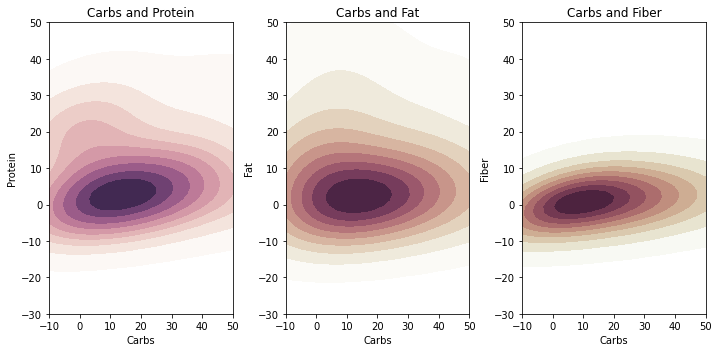

In [28]:
f, axes = plt.subplots(1, 3, figsize=(10, 5))

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=modi_df['Carbs'], y=modi_df['Protein'], cmap=cmap, shade=True, ax=axes[0])
axes[0].set(xlim=(-10, 50), ylim=(-30, 50), title = 'Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)
sns.kdeplot(x=modi_df['Carbs'], y=modi_df['Fat'], cmap=cmap, shade=True, ax=axes[1])
axes[1].set(xlim=(-10, 50), ylim=(-30, 50), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
sns.kdeplot(x=modi_df['Carbs'], y=modi_df['Fiber'], cmap=cmap, shade=True, ax=axes[2])
axes[2].set(xlim=(-10, 50), ylim=(-30, 50), title = 'Carbs and Fiber')

f.tight_layout()

### 단백질 순위

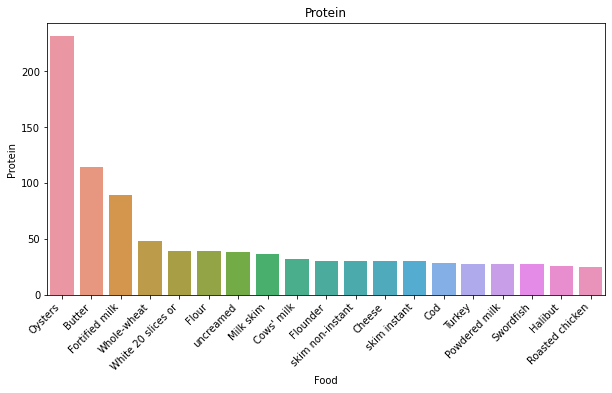

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Protein')
protein_rich = modi_df.sort_values(by='Protein', ascending= False)
sns.barplot(data=protein_rich.head(20), x='Food', y='Protein')
plt.xticks(rotation=45, ha='right');

### 칼로리 순위

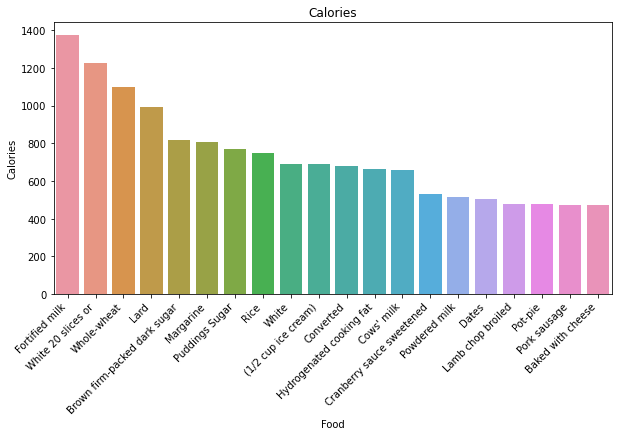

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Calories')
protein_rich = modi_df.sort_values(by='Calories', ascending= False)
sns.barplot(data=protein_rich.head(20), x='Food', y='Calories')
plt.xticks(rotation=45, ha='right');

### 지방 순위

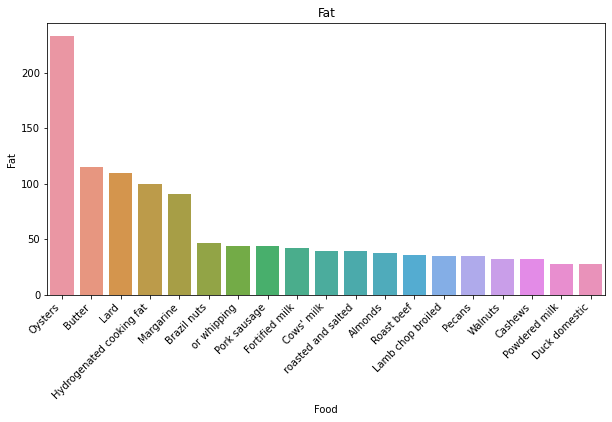

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Fat')
protein_rich = modi_df.sort_values(by='Fat', ascending= False)
sns.barplot(data=protein_rich.head(20), x='Food', y='Fat')
plt.xticks(rotation=45, ha='right');

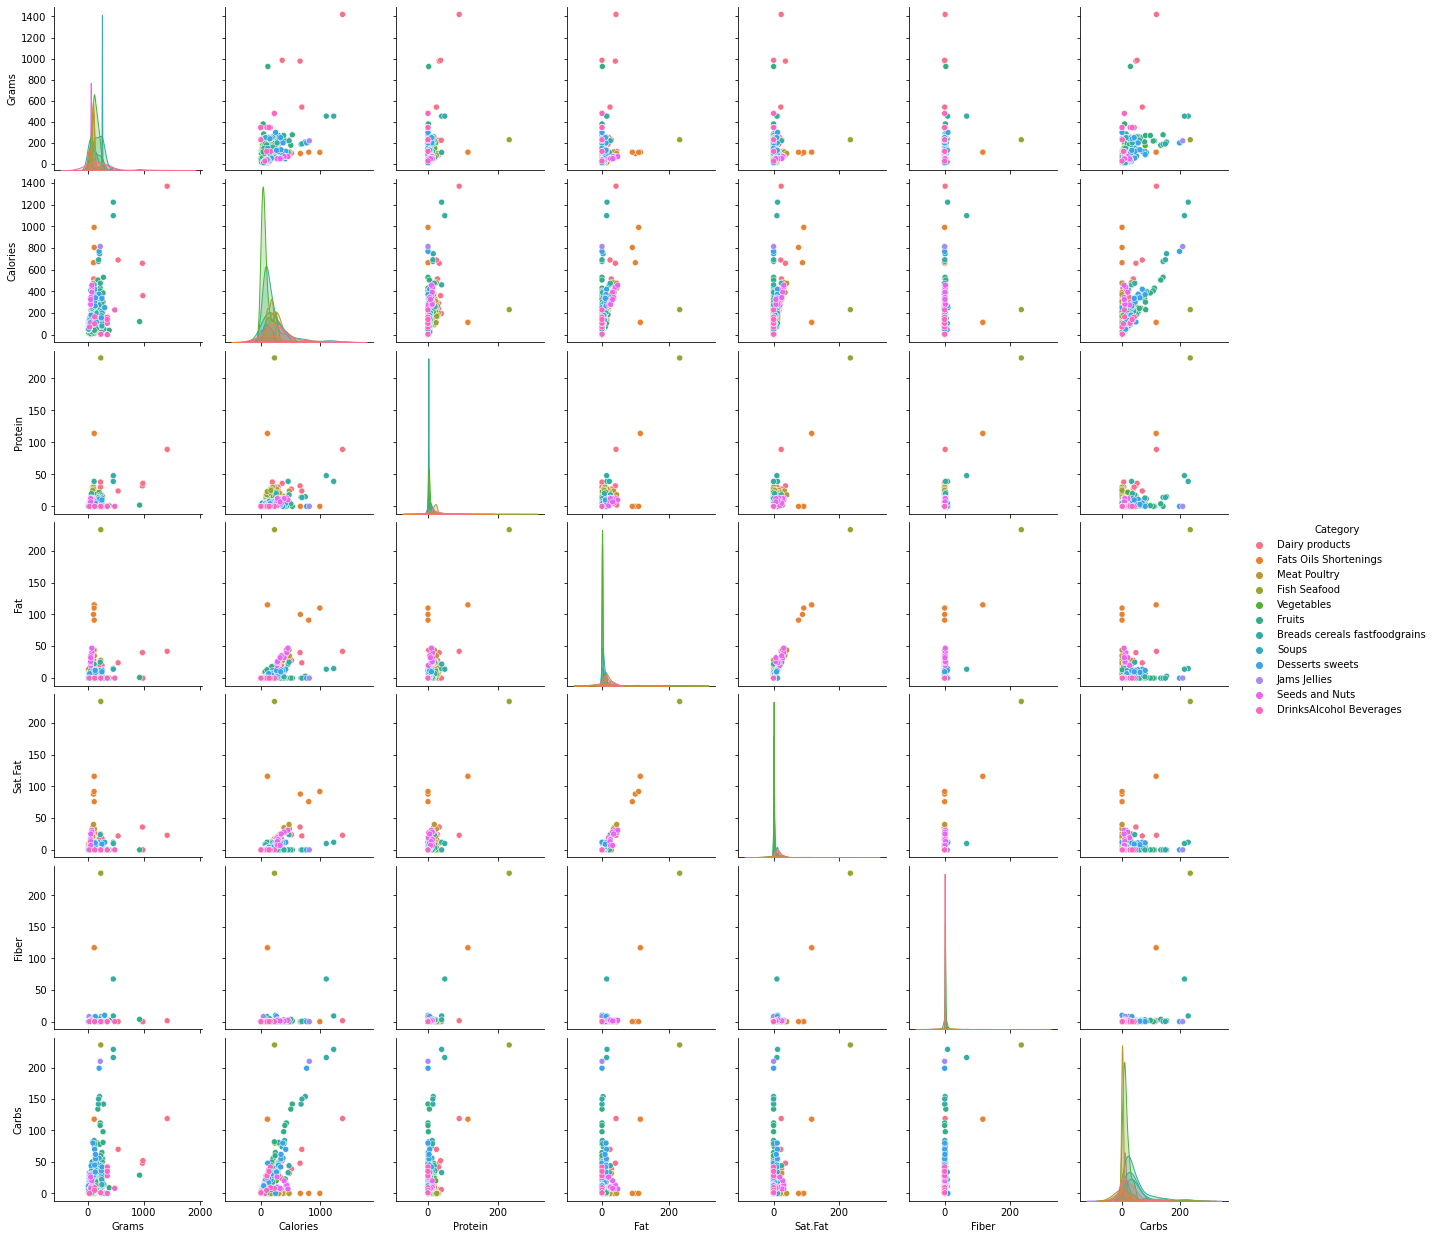

In [32]:
sns.pairplot(data=modi_df2, hue='Category');

## 데이터 처리

* 정규화
    * 0 ~ 1 사이의 값으로 매핑
    * feature들의 단위 통일화

<img src="https://i.stack.imgur.com/EuitP.png" width="300">

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(modi_df2.iloc[:, 1:-1])
modi_df3 = pd.DataFrame(scaler.transform(modi_df2.iloc[:, 1:-1]), columns=modi_df2.columns[1:-1])

In [34]:
modi_df3

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
0,0.685369,0.480699,0.137931,0.171674,0.153846,0.000000,0.203390
1,0.691051,0.262200,0.155172,0.000000,0.000000,0.000000,0.220339
2,0.166903,0.092498,0.038793,0.021459,0.017094,0.000000,0.055085
3,0.171165,0.251275,0.068966,0.085837,0.076923,0.000000,0.101695
4,1.000000,1.000000,0.383621,0.180258,0.098291,0.005957,0.504237
...,...,...,...,...,...,...,...
327,0.237926,0.117261,0.000000,0.000000,0.000000,0.000000,0.177966
328,0.237926,0.076475,0.000000,0.000000,0.000000,0.000000,0.118644
329,0.237926,0.101966,0.000000,0.000000,0.000000,0.000000,0.148305
330,0.155540,0.002185,0.000000,0.000000,0.000000,0.000000,0.004237


## 데이터 분리

In [35]:
x = modi_df3.iloc[:, 1:-1]
x

,Calories,Protein,Fat,Sat.Fat,Fiber
0,0.480699,0.137931,0.171674,0.153846,0.000000
1,0.262200,0.155172,0.000000,0.000000,0.000000
2,0.092498,0.038793,0.021459,0.017094,0.000000
3,0.251275,0.068966,0.085837,0.076923,0.000000
4,1.000000,0.383621,0.180258,0.098291,0.005957
...,...,...,...,...,...
327,0.117261,0.000000,0.000000,0.000000,0.000000
328,0.076475,0.000000,0.000000,0.000000,0.000000
329,0.101966,0.000000,0.000000,0.000000,0.000000
330,0.002185,0.000000,0.000000,0.000000,0.000000


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

In [37]:
x_train

,Calories,Protein,Fat,Sat.Fat,Fiber
197,0.142025,0.004310,0.000000,0.000000,0.008511
223,0.072833,0.012931,0.017167,0.008547,0.001277
32,0.484341,0.000000,0.429185,0.376068,0.000000
267,0.083758,0.025862,0.017167,0.012821,0.000851
305,0.072833,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
42,0.069192,0.017241,0.034335,0.029915,0.000000
163,0.160233,0.008621,0.000000,0.000000,0.004255
122,0.009468,0.000000,0.000000,0.000000,0.002128
22,0.076475,0.008621,0.047210,0.042735,0.000000


In [38]:
y_train

,Traget
197,6
223,0
32,4
267,10
305,7
...,...
42,8
163,6
122,11
22,1


## 모델 정의

### DT

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=37)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)

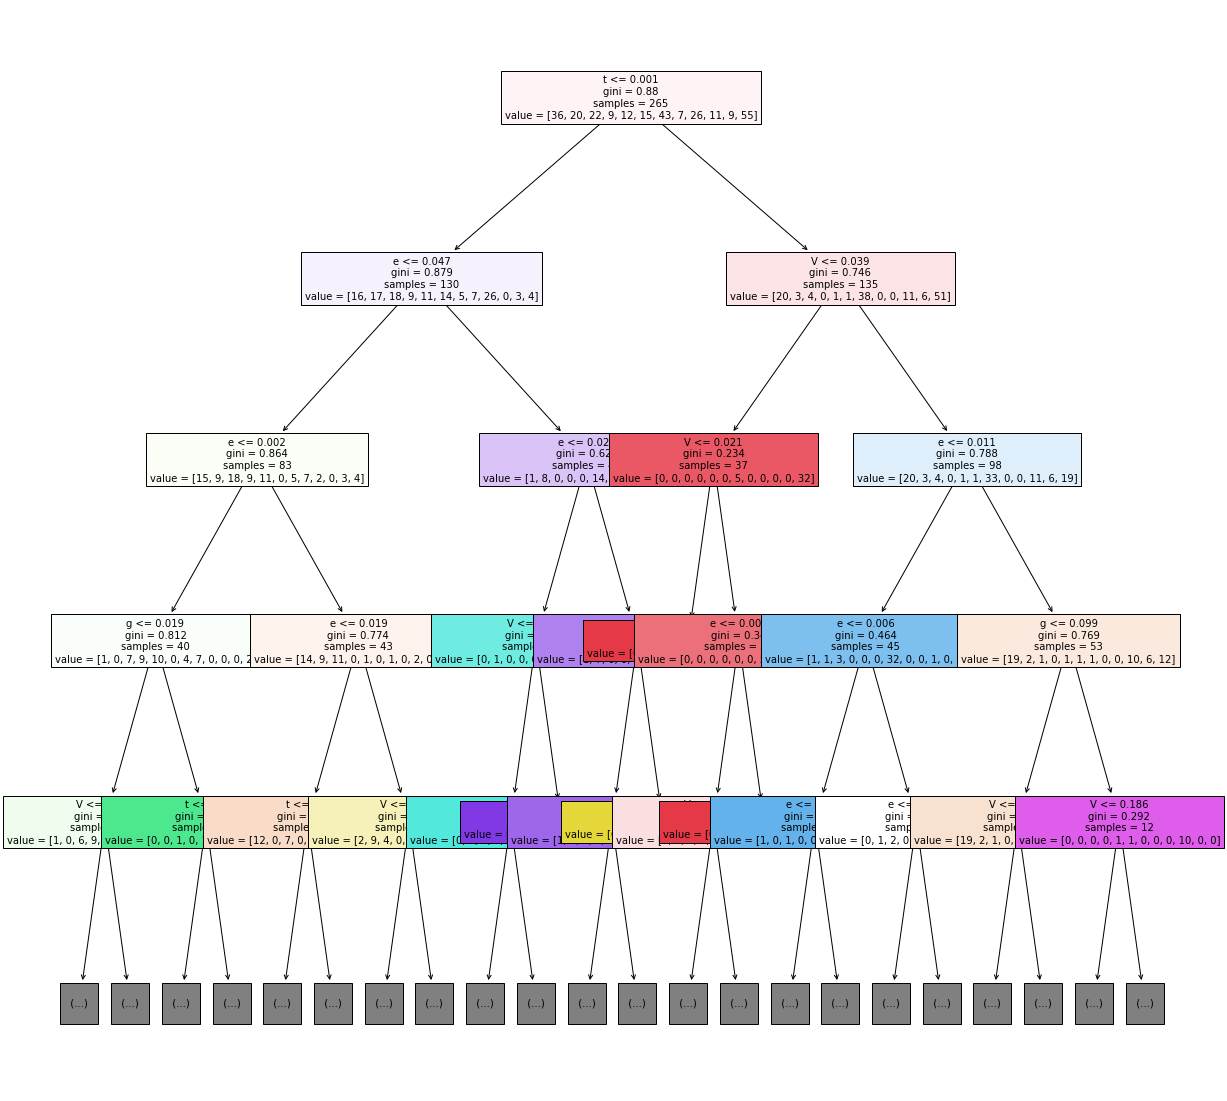

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree_plot = plot_tree(tree,
                 feature_names=col,
                 max_depth=4,
                 filled=True,
                 fontsize=10)

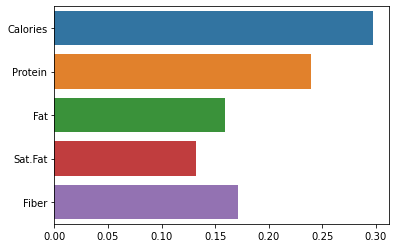

In [41]:
sns.barplot(x=tree.feature_importances_, y=x.columns);

In [42]:
tree.score(x_test, y_test)

0.6567164179104478

In [43]:
from tqdm import notebook

def depth_check(train_x, train_y, test_x, test_y, n=100):
    opt_depth, max_score = 0, 0
    tree_score = []

    for i in notebook.tqdm(range(1, n+1)):
        tree = DecisionTreeClassifier(max_depth=i)
        tree.fit(train_x, train_y)
        y_predict = tree.predict(test_x)
        if max_score <= round(tree.score(test_x, test_y), 2):
            max_score = round(tree.score(test_x, test_y), 2)
            opt_depth = i

        tree_score.append(round(tree.score(test_x, test_y), 2))
        
    plt.figure(figsize=(10, 5))
    plt.xlabel('depth')
    plt.ylabel('acc')
    plt.plot(range(1, len(tree_score)+1), tree_score)
    plt.axvline(opt_depth, ls=":", lw=1)
    plt.axhline(max_score, ls=":", lw=1);

    print(f'depth: {opt_depth} \tMax score: {max_score}')

  0%|          | 0/100 [00:00<?, ?it/s]

depth: 84 	Max score: 0.72


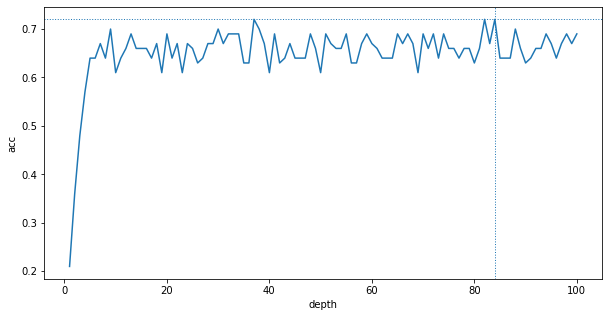

In [44]:
depth_check(x_train, y_train, x_test, y_test)

### K-nn

오늘 설명에서 반대로 내용을 설명을 드렸습니다. 혼란을 드려 죄송합니다.  
n이 적을 땐 overfiting, n이 클 땐 underfitting입니다.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [46]:
knn.fit(x_train, np.array(y_train).reshape(-1))

KNeighborsClassifier(n_neighbors=2)

In [47]:
y_pred = knn.predict(x_test)
y_pred

array([ 2,  2,  6,  0,  2,  0,  6,  8,  2,  0,  6,  6,  3, 10, 11,  4,  0,
        6, 11,  0,  6,  1,  0,  2,  6,  0,  1,  0,  4,  8,  5,  2,  9,  3,
       11, 10,  2,  2,  0,  0,  2, 11, 11,  8,  0,  0,  3,  6,  2,  3,  0,
        6,  1,  0, 11, 11,  3,  5,  1,  0,  2, 11,  5,  6, 11,  6,  1])

In [48]:
knn.score(x_test, y_test)

0.5671641791044776

In [49]:
def n_check(train_x, train_y, test_x, test_y, n=100):
    opt_neighbor, max_score = 0, 0
    knn_score = []

    for i in notebook.tqdm(range(1, n+1)):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x, np.array(train_y).reshape(-1))
        y_predict = knn.predict(test_x)
        if max_score <= round(knn.score(test_x, test_y), 2):
            max_score = round(knn.score(test_x, test_y), 2)
            opt_neighbor = i

        knn_score.append(round(knn.score(test_x, test_y), 2))

    plt.figure(figsize=(10, 5))
    plt.xlabel('n')
    plt.ylabel('acc')
    plt.plot(range(1, len(knn_score)+1), knn_score)
    plt.axvline(opt_neighbor, ls=":", lw=1)
    plt.axhline(max_score, ls=":", lw=1);

    print(f'n: {opt_neighbor} \tMax score: {max_score}')

  0%|          | 0/100 [00:00<?, ?it/s]

n: 1 	Max score: 0.67


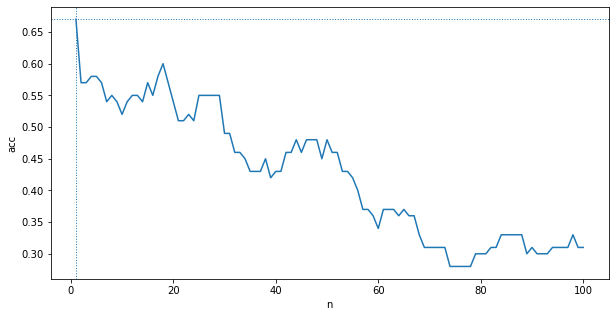

In [50]:
n_check(x_train, y_train, x_test, y_test)

# 의류 데이터

## 사례

## 데이터 로드

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
train = pd.read_csv('fashion_train.csv')
test = pd.read_csv('fashion_test.csv')

In [53]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 데이터 확인

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


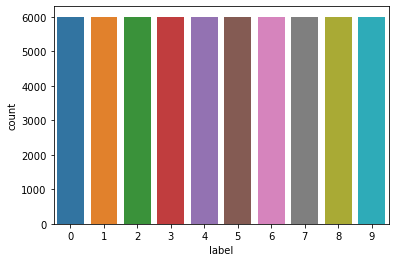

In [78]:
sns.countplot(data=train, x='label');

## 데이터 전처리

### Train

#### 데이터 분리

* 편의를 위해 데이터 분리

In [54]:
trainx = train.iloc[:, 1:]
trainx

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
trainy = train.iloc[:, 0]
trainy

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

#### 이미지에 맞도록 데이터 형태 변환 및 스케일링

In [56]:
np.sqrt(784)

28.0

In [57]:
trainx_ = trainx.values.reshape(-1, 28, 28) / 255
trainx_.shape

(60000, 28, 28)

In [58]:
def visualize(data, y): 
    cols = []
    for i in y:
        if i not in cols:
            cols.append(i)
        if len(cols) == 9:
            break
    
    gp = plt.figure(figsize=(20,20))
    gp.subplots_adjust(wspace=0.4, hspace=0.4)
    
    for i, target in enumerate(cols):
        ax = gp.add_subplot(3, 3, i+1)
        plt.imshow(data[target])
        ax.set_title(f'plot for {cols[i]}')

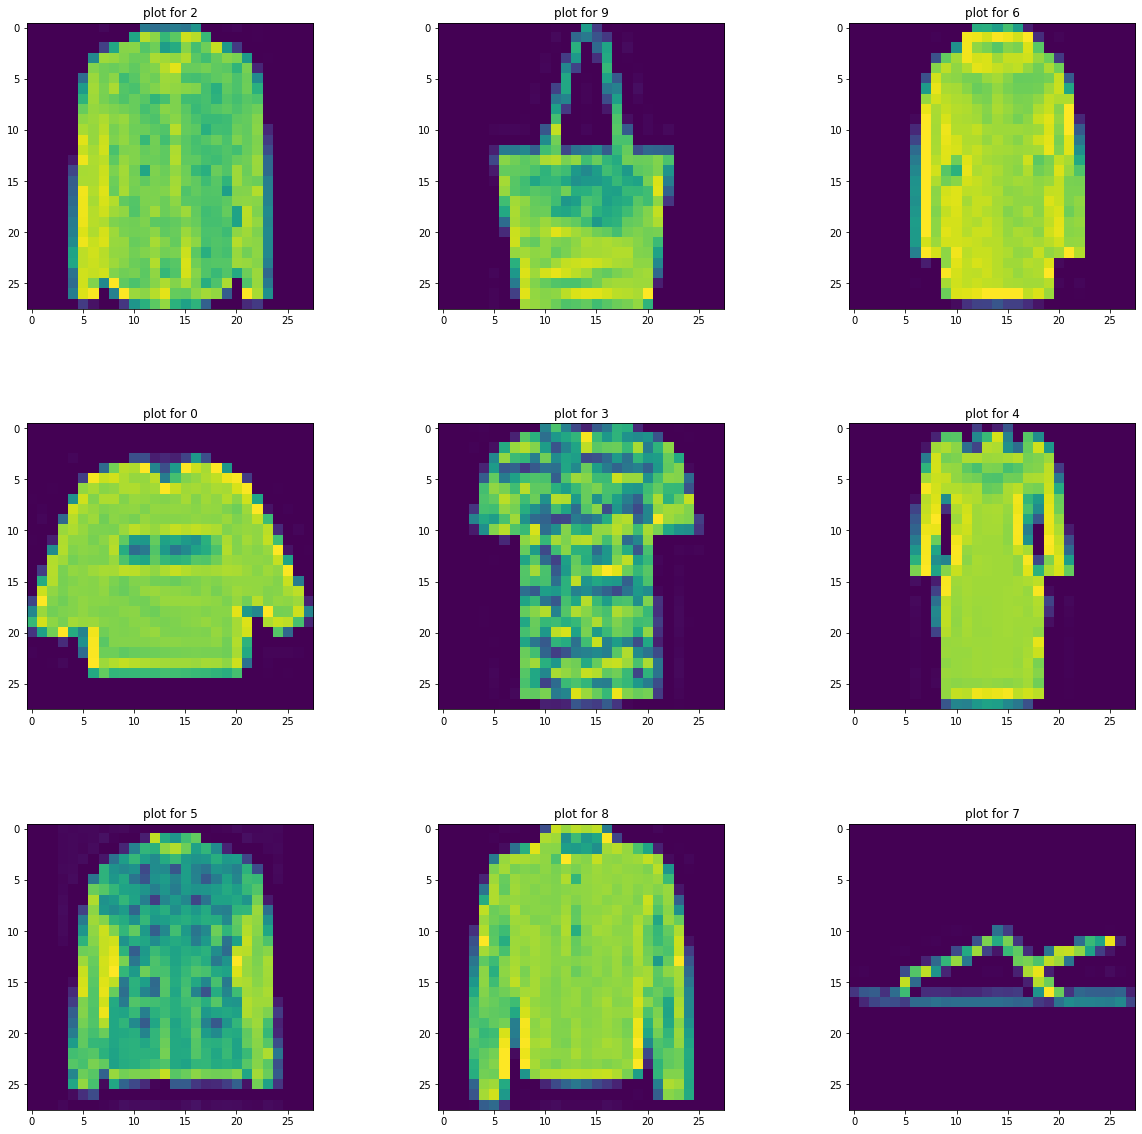

In [59]:
visualize(trainx_, trainy)

In [60]:
trainx_ = trainx_.reshape(trainx_.shape[0], -1)

In [61]:
trainx_.shape

(60000, 784)

### Test

#### 데이터 분리

In [62]:
testx = test.iloc[:, 1:]
testx

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
testy = test.iloc[:, 0]
testy

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

#### 이미지에 맞도록 데이터 형태 변환 및 스케일링

In [64]:
testx_ = testx.values.reshape(-1, 28, 28) / 255
testx_.shape

(10000, 28, 28)

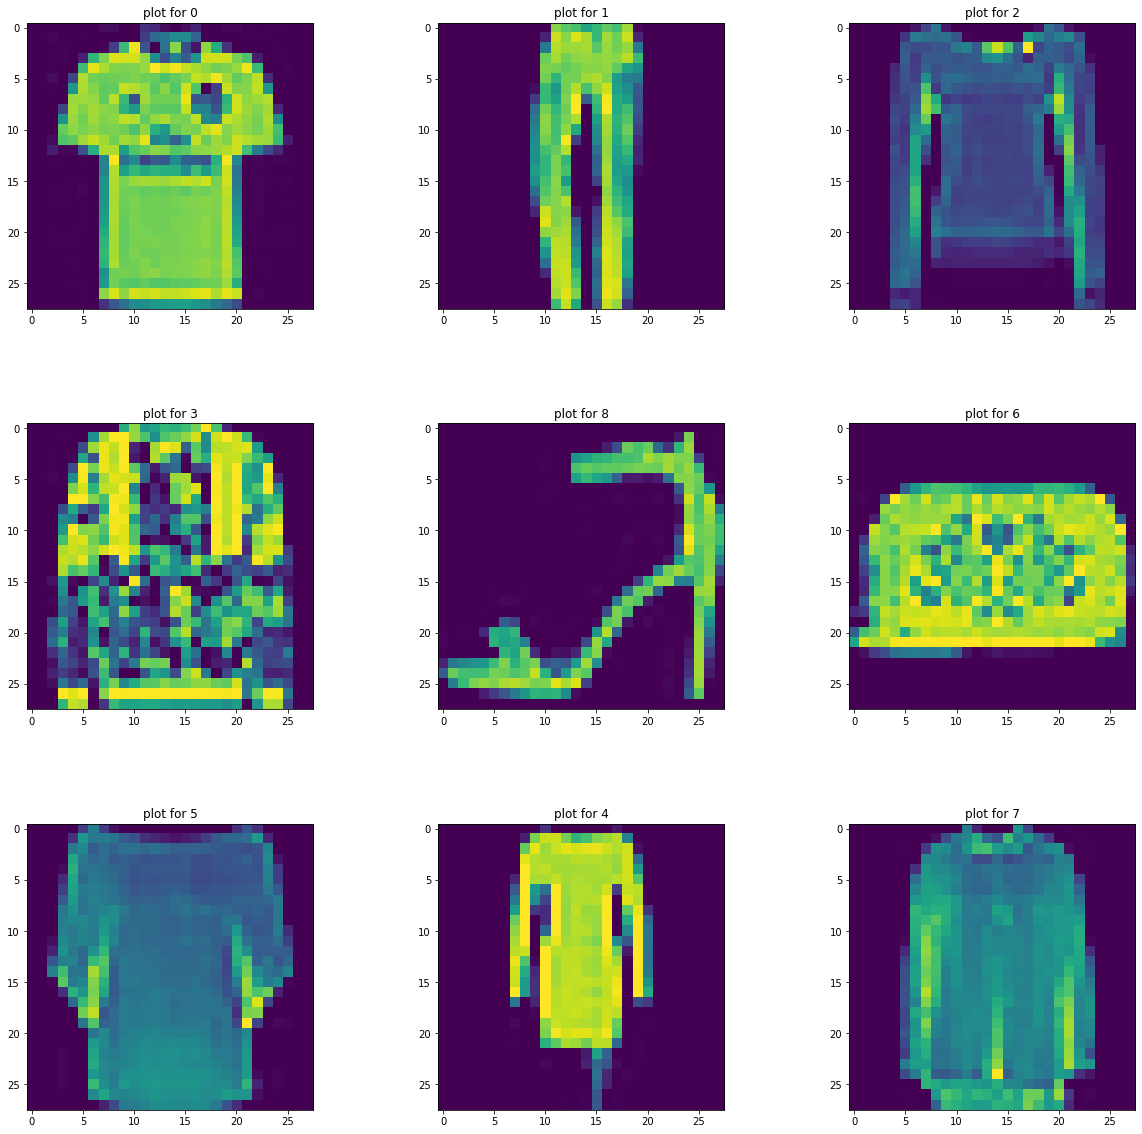

In [65]:
visualize(testx_, testy)

In [66]:
testx_ = testx_.reshape(testx_.shape[0], -1)

In [67]:
testx_.shape

(10000, 784)

### 모델 정의

In [68]:
from sklearn.tree import DecisionTreeClassifier

depth = 10

tree = DecisionTreeClassifier(max_depth=depth, random_state=37)
tree.fit(trainx_, trainy)
y_predict = tree.predict(testx_)

In [69]:
tree.score(trainx_, trainy)

0.8479833333333333

In [70]:
tree.score(testx_, testy)

0.8075

  0%|          | 0/20 [00:00<?, ?it/s]

depth: 15 	Max score: 0.82


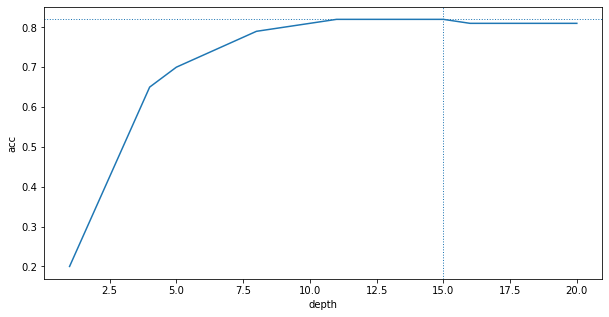

In [71]:
depth_check(trainx_, trainy, testx_, testy, 20)

  0%|          | 0/3 [00:00<?, ?it/s]

n: 3 	Max score: 0.86


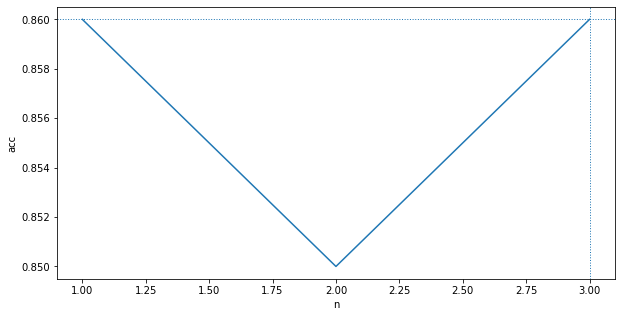

In [72]:
n_check(trainx_, trainy, testx_, testy, 3)